Instructions: click restart and run all above. Figures will show once the entire notebook has finished running (will take a few minutes)

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import glob
import ipywidgets as widgets
from tqdm import tqdm
from membranequant import *
%matplotlib notebook

# Investigating spatial differences in fluorescent signal patterns around the embryo

An assumption of our model is that membrane and cytoplasmic reference profiles do not vary around the circumference of the cell (allowing us to use single cytoplasmic and membrane profiles for all positions). Here, I test this assumption.

## Cytoplasmic reference profile

### Import data

In [2]:
path = '../test_datasets/dataset3_pkc3_par3mutant'
paths = direcslist(path)
images = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI.txt') for p in paths]

### Set up quantifiers

We can specify to focus quantification to either the midcell or poles by setting the position_weights parameter in ImageQuant.

e.g. For the polar quantifier use weights of 1 for polar regions and weights of 0.1 for midcell regions. This way, concentration and alignment parameters are set everywhere, but global cytbg is influenced mainly by polar regions

In [3]:
from scipy.special import erf

sigma = 2
thickness = 50
cytbg = (1 + erf((np.arange(thickness) - thickness / 2) / sigma)) / 2

polar_weights = np.r_[np.ones(20), np.zeros(40) + 0.1, np.ones(40), np.zeros(40) + 0.1, np.ones(20)]
midcell_weights = 1 - polar_weights

iq_polar = ImageQuant(images, roi=rois, cyt_only=True, uni_cyt=True, iterations=2, adaptive_cytbg=True, thickness=thickness, cytbg=cytbg, descent_steps=1000, nfits=160, periodic=False, position_weights=polar_weights)
iq_midcell = ImageQuant(images, roi=rois, cyt_only=True, uni_cyt=True, iterations=2, adaptive_cytbg=True, thickness=thickness, cytbg=cytbg, descent_steps=1000, nfits=160, periodic=False, position_weights=midcell_weights)


### Run quantification

In [4]:
iq_polar.run()
iq_midcell.run()

100%|██████████| 1000/1000 [00:47<00:00, 21.25it/s]


Time elapsed: 100.83 seconds 


100%|██████████| 1000/1000 [00:26<00:00, 37.38it/s]

Time elapsed: 66.97 seconds 


### Plot reference profiles

Looks very similar between midcell and poles

<IPython.core.display.Javascript object>


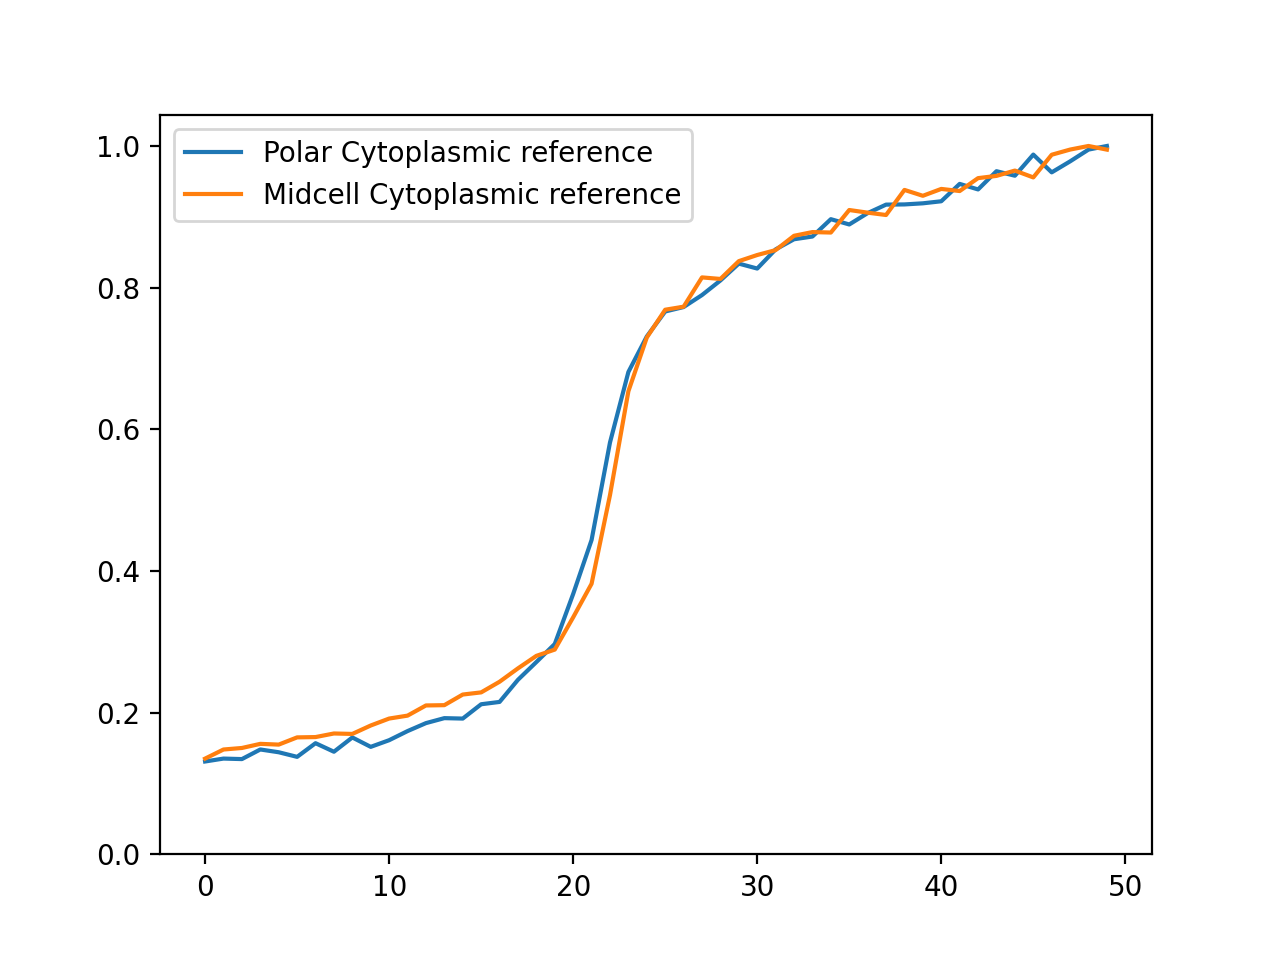

In [5]:
fig, ax = plt.subplots()
ax.plot(iq_polar.cytbg / max(iq_polar.cytbg), label='Polar Cytoplasmic reference')
ax.plot(iq_midcell.cytbg / max(iq_midcell.cytbg), label='Midcell Cytoplasmic reference')
ax.set_ylim(bottom=0)
ax.legend()

## Membrane reference profile


### Import data

In [6]:
path = '../test_datasets/dataset2_par2_neon'
paths = direcslist(path)
images = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI.txt') for p in paths]

### Set up quantifiers

In [7]:
sigma = 2
thickness = 50
membg = np.exp(-((np.arange(thickness) - thickness / 2) ** 2) / (2 * sigma ** 2))
cytbg = np.loadtxt('saved_cyt_ref_profile.txt')

polar_weights = np.r_[np.ones(20), np.zeros(40) + 0.1, np.ones(40), np.zeros(40) + 0.1, np.ones(20)]
midcell_weights = 1 - polar_weights

iq_polar = ImageQuant(images, roi=rois, iterations=2, adaptive_membg=True, thickness=50, cytbg=cytbg, membg=membg, descent_steps=1000, uni_cyt=True, nfits=160, position_weights=polar_weights)
iq_midcell = ImageQuant(images, roi=rois, iterations=2, adaptive_membg=True, thickness=50, cytbg=cytbg, membg=membg, descent_steps=1000, uni_cyt=True, nfits=160, position_weights=midcell_weights)


### Run quantification

In [8]:
iq_polar.run()
iq_midcell.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

Time elapsed: 69.34 seconds 


100%|██████████| 1000/1000 [00:35<00:00, 28.16it/s]

Time elapsed: 70.78 seconds 


### Plot reference profiles

They are not exactly the same, but very similar (within ~5% all over). Difference may be due to local curvature, or the fact that the midcell region covers the domain boundary.

<IPython.core.display.Javascript object>


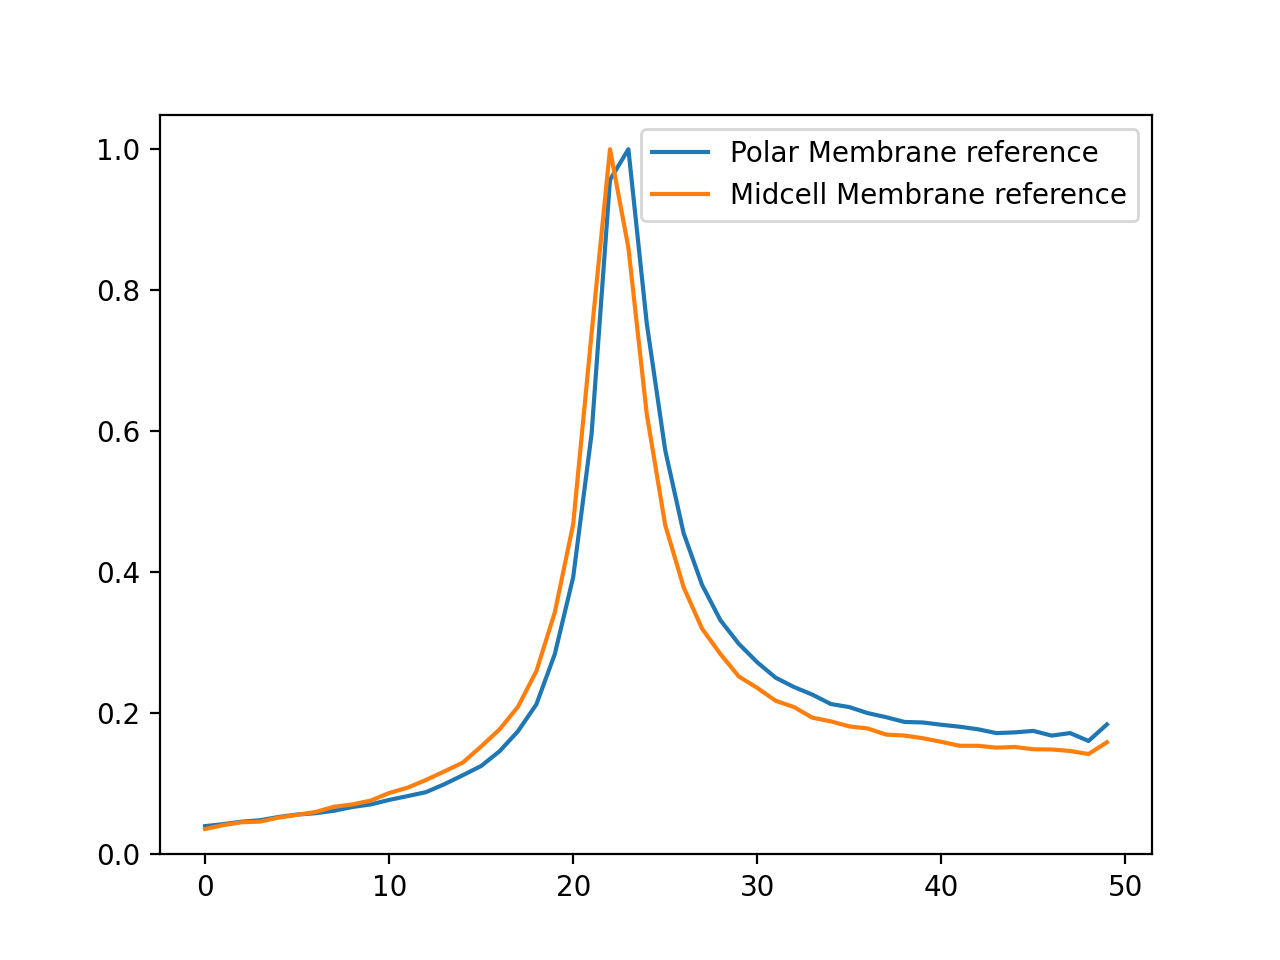

In [9]:
fig, ax = plt.subplots()
ax.plot(iq_polar.membg / max(iq_polar.membg), label='Polar Membrane reference')
ax.plot(iq_midcell.membg / max(iq_midcell.membg), label='Midcell Membrane reference')
ax.set_ylim(bottom=0)
ax.legend()